In [1]:
from keras.layers import Dense
from keras.models import Sequential
from keras.activations import sigmoid
from keras.losses import binary_crossentropy, categorical_crossentropy
# from keras.optimizer_v1 import SGD
from tensorflow.keras.optimizers import SGD 

In [12]:
import numpy as np

## Load Data

In [6]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

11501568/11490434 [==============================] - 4s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


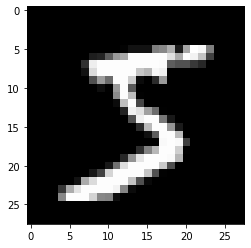

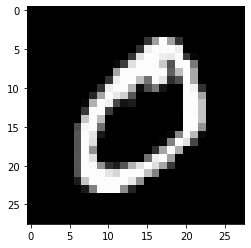

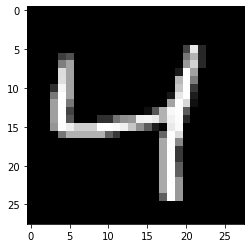

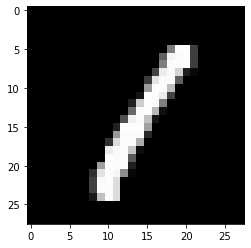

In [7]:
for i in range(4):
    plt.imshow(x_train[i], cmap=plt.cm.gray)
    plt.show()

In [10]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [18]:
np.identity(10)[y_train[0:2]] #- > I[5], I[4]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [20]:
I = np.identity(10, dtype='int')
y_train = I[y_train]
y_test = I[y_test]
print(y_train.shape, y_test.shape)

(60000, 10) (10000, 10)


In [29]:
model = Sequential()
model.add(Dense(units=300, activation='sigmoid', input_shape=(784,)))
model.add(Dense(units=150, activation='sigmoid'))
model.add(Dense(units=50, activation='sigmoid'))
model.add(Dense(units=10, activation='softmax'))

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_9 (Dense)              (None, 150)               45150     
_________________________________________________________________
dense_10 (Dense)             (None, 50)                7550      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                510       
Total params: 288,710
Trainable params: 288,710
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(optimizer=SGD(learning_rate=0.1), loss='categorical_crossentropy', metrics='accuracy')
model.fit(x_train.reshape(-1,784), y_train, epochs=10, batch_size=500)

Epoch 1/10
120/120 [==============================] - 5s 37ms/step - loss: 0.1777 - accuracy: 0.9528
Epoch 2/10
120/120 [==============================] - 5s 39ms/step - loss: 0.1696 - accuracy: 0.9554
Epoch 3/10
120/120 [==============================] - 5s 44ms/step - loss: 0.1641 - accuracy: 0.9564
Epoch 4/10
120/120 [==============================] - 5s 39ms/step - loss: 0.1605 - accuracy: 0.9571
Epoch 5/10
120/120 [==============================] - 5s 41ms/step - loss: 0.1518 - accuracy: 0.9599
Epoch 6/10
120/120 [==============================] - 5s 42ms/step - loss: 0.1444 - accuracy: 0.9622
Epoch 7/10
120/120 [==============================] - 4s 34ms/step - loss: 0.1381 - accuracy: 0.9637
Epoch 8/10
120/120 [==============================] - 5s 39ms/step - loss: 0.1339 - accuracy: 0.9643
Epoch 9/10
120/120 [==============================] - 4s 31ms/step - loss: 0.1308 - accuracy: 0.9649 2s - loss: 0.1196 - accuracy:  - ETA: 2s - loss: 0.1220 - accuracy - ETA: 2s
Epoch 10/10
12

In [34]:
model.evaluate(x_test.reshape(-1,784), y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.1473 - accuracy: 0.9586


[0.14734776318073273, 0.9585999846458435]